# Classification

### Train a Decision Tree classifier

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



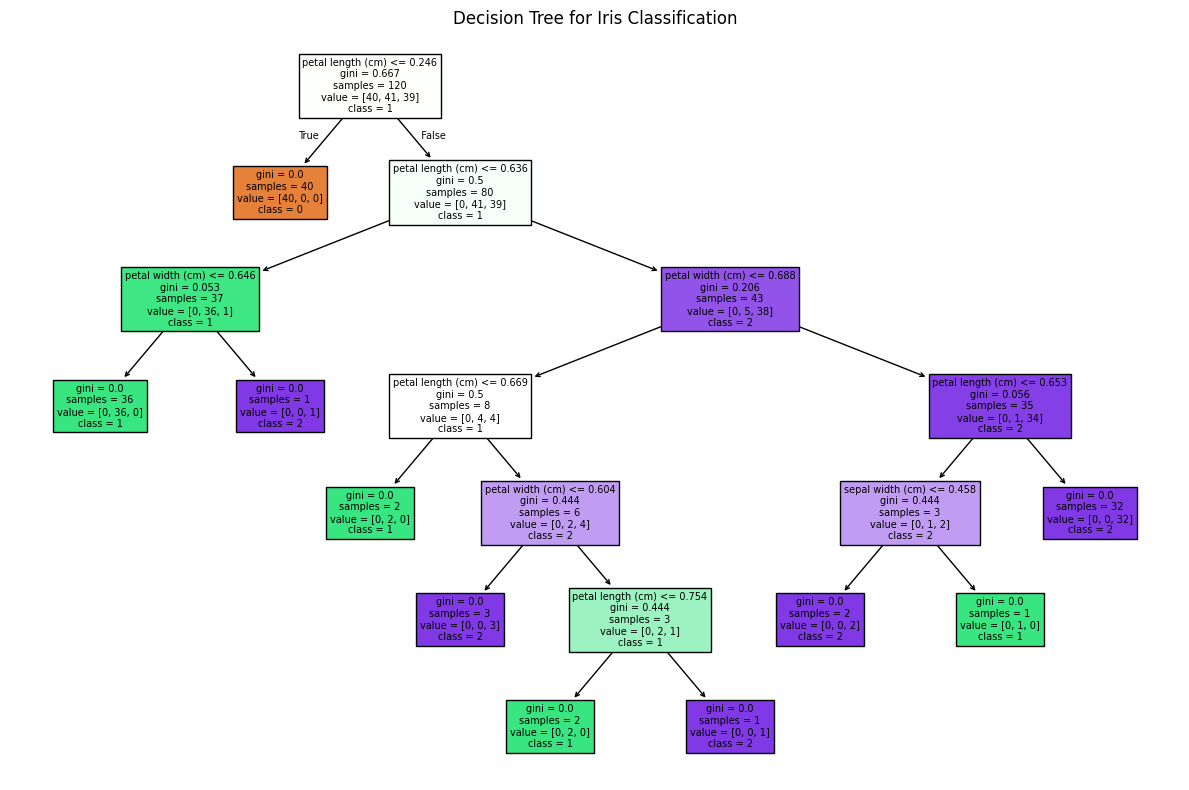

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load preprocessed data
iris_preprocessed = pd.read_csv(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\Data Mining\Data Pre and Explo\data\iris_preprocessed.csv')

# Separate features and true labels
feature_cols = [col for col in iris_preprocessed.columns if not col.startswith('class_')]
X = iris_preprocessed[feature_cols]
y = iris_preprocessed[[col for col in iris_preprocessed.columns if col.startswith('class_')]].idxmax(axis=1).str.replace('class_', '').astype(int)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=feature_cols, class_names=['0','1','2'], filled=True)
plt.title('Decision Tree for Iris Classification')
plt.tight_layout()
plt.savefig(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\images\decision_tree_iris.png')
plt.show()

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Compute metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f'KNN Accuracy: {accuracy_knn:.3f}')
print(f'KNN Precision: {precision_knn:.3f}')
print(f'KNN Recall: {recall_knn:.3f}')
print(f'KNN F1-score: {f1_knn:.3f}')
print('\nKNN Classification Report:\n', classification_report(y_test, y_pred_knn))

# Compare classifiers
if accuracy_knn > accuracy:
    print('KNN classifier performs better than Decision Tree on this test set.')
elif accuracy_knn < accuracy:
    print('Decision Tree classifier performs better than KNN on this test set.')
else:
    print('Both classifiers perform equally well on this test set.')

KNN Accuracy: 1.000
KNN Precision: 1.000
KNN Recall: 1.000
KNN F1-score: 1.000

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Both classifiers perform equally well on this test set.


# Association Rule

### Generate transactional data

In [3]:
import random
import pandas as pd

# Pool of items
items_pool = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'apples', 'bananas', 'chicken', 'rice', 'cheese',
              'butter', 'yogurt', 'juice', 'cereal', 'coffee', 'tea', 'chips', 'soda', 'lettuce', 'tomatoes']

# Patterns: milk & bread, beer & diapers, eggs & cheese are frequent
patterns = [
    ['milk', 'bread'],
    ['beer', 'diapers'],
    ['eggs', 'cheese']
]

# Generate transactions
num_transactions = random.randint(20, 50)
transactions = []
for _ in range(num_transactions):
    basket_size = random.randint(3, 8)
    basket = set(random.choices(items_pool, k=basket_size))
    # Add a pattern with higher probability
    if random.random() < 0.6:
        pattern = random.choice(patterns)
        basket.update(pattern)
    transactions.append(list(basket))

# Convert to pandas DataFrame for display
transactions_df = pd.DataFrame({'Transaction': transactions})
print(transactions_df.head())

                                         Transaction
0                [rice, tomatoes, chips, milk, eggs]
1              [apples, cheese, diapers, milk, eggs]
2                          [chicken, apples, cheese]
3  [butter, bread, apples, chips, bananas, yogurt...
4          [juice, beer, tomatoes, lettuce, diapers]


### Apply Apriori algorithm

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare transaction data for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions_df['Transaction']).transform(transactions_df['Transaction'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Sort by lift and display top 5 rules
top_rules = rules.sort_values(by='lift', ascending=False).head(5)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents   support  confidence      lift
6    (cheese)      (eggs)  0.294118    0.714286  1.868132
7      (eggs)    (cheese)  0.294118    0.769231  1.868132
3      (milk)     (bread)  0.294118    0.588235  1.818182
4     (bread)      (milk)  0.294118    0.909091  1.818182
5    (cereal)   (diapers)  0.235294    0.800000  1.431579


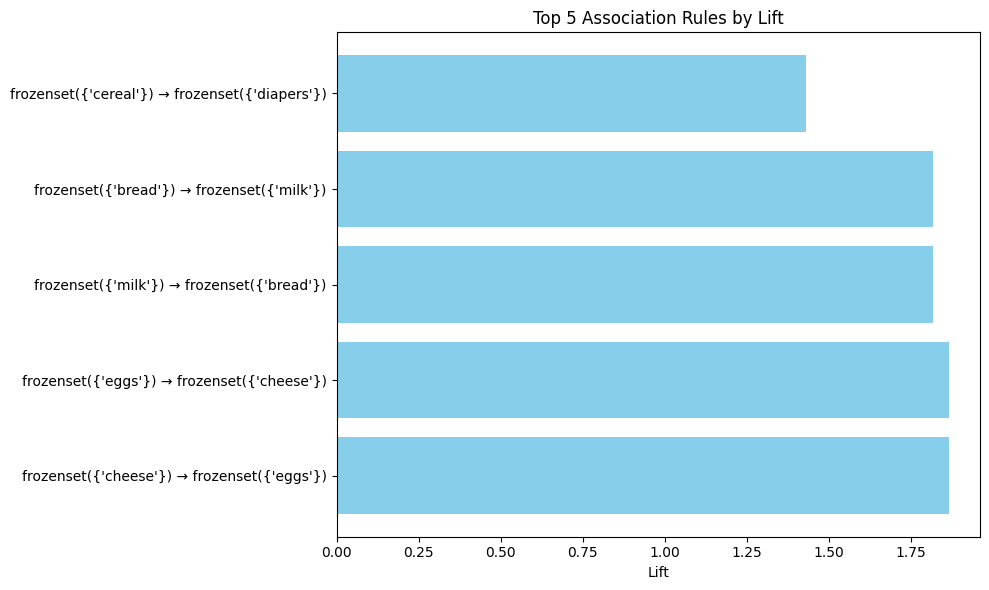

In [5]:
import matplotlib.pyplot as plt

# Bar plot of top 5 rules by lift
plt.figure(figsize=(10,6))
plt.barh(top_rules['antecedents'].astype(str) + ' → ' + top_rules['consequents'].astype(str), top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 5 Association Rules by Lift')
plt.tight_layout()
plt.savefig(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\images\association_rules_lift.png')
plt.show()